# Lecture 5: Graph Visualization, Graph Searches, and the Edmonton Map

I use Google Colaboratory for my notebooks. You can modify this document by saving a copy to your own Google Drive. Just click **OPEN IN PLAYGROUND** near the top and you can start modifying the document to your heart's content. If you want to save the changes, then just click **Copy to Drive** to save a *copy* of the document to your Google Drive.

**Objectives**:

*   Introduction to the first assignment
*   Using graphviz to visualize graphs
*   The basics of searching an unweighted graph: breadth-first search and depth-first search
*   The Edmonton graph file

See the eClass entry for this lecture for the slides describing the searches and see the Assignment 1 files for the Edmonton graph itself. The slides won't be available until shortly after the lecture.

Oh, one last thing. Like with Jupyter Notebooks it is easy to write nice math equations using LaTeX :)

Try double-clicking this text block if you are working on a copy of this to see how.

$$ \int_1^n \frac{dx}{x} = \ln n $$


$$ \lim_{t \rightarrow 0} \frac{f(x+t) - f(x)}{t} = f'(x) $$

Press shift+enter to stop editing a text block.

Press shift+enter or click the "play" arrow at the upper-left corner of a code block to run the code.

# Preamble and the Graph Class

Install the ```graphviz``` packages for the ```graph_draw``` function below. Run the first block (just below this) at least once!

**VM Note**: The graphviz utility is already install on the VM but the Python package is not. To install graphviz for Python on the VM, execute the following:

```
sudo pip3 install graphviz
```

Enter **cmput274** as the password when prompted.

In [1]:
!apt-get -qq install -y graphviz
!pip install graphviz

Extracting templates from packages: 100%
Selecting previously unselected package libxext6:amd64.
(Reading database ... 16633 files and directories currently installed.)
Preparing to unpack .../00-libxext6_2%3a1.3.3-1_amd64.deb ...
Unpacking libxext6:amd64 (2:1.3.3-1) ...
Selecting previously unselected package fontconfig.
Preparing to unpack .../01-fontconfig_2.11.94-0ubuntu2_amd64.deb ...
Unpacking fontconfig (2.11.94-0ubuntu2) ...
Selecting previously unselected package x11-common.
Preparing to unpack .../02-x11-common_1%3a7.7+19ubuntu3_all.deb ...
Unpacking x11-common (1:7.7+19ubuntu3) ...
Selecting previously unselected package libice6:amd64.
Preparing to unpack .../03-libice6_2%3a1.0.9-2_amd64.deb ...
Unpacking libice6:amd64 (2:1.0.9-2) ...
Selecting previously unselected package libsm6:amd64.
Preparing to unpack .../04-libsm6_2%3a1.2.2-1_amd64.deb ...
Unpacking libsm6:amd64 (2:1.2.2-1) ...
Selecting previously unselected package libjbig0:amd64.
Preparing to unpack .../05-libjbig0

Setting up libpathplan4 (2.38.0-16ubuntu2) ...
Setting up libxcb-render0:amd64 (1.12-1ubuntu1) ...
Setting up libxext6:amd64 (2:1.3.3-1) ...
Setting up libjbig0:amd64 (2.1-3.1) ...
Setting up libdatrie1:amd64 (0.2.10-5) ...
Setting up libtiff5:amd64 (4.0.8-5) ...
Setting up libgraphite2-3:amd64 (1.3.10-2) ...
Setting up libpixman-1-0:amd64 (0.34.0-1) ...
Processing triggers for libc-bin (2.26-0ubuntu2) ...
Setting up libltdl7:amd64 (2.4.6-2) ...
Setting up libxcb-shm0:amd64 (1.12-1ubuntu1) ...
Setting up libxpm4:amd64 (1:3.5.12-1) ...
Setting up libthai-data (0.1.26-3) ...
Setting up x11-common (1:7.7+19ubuntu3) ...
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libcdt5 (2.38.0-16ubuntu2) ...
Setting up fontconfig (2.11.94-0ubuntu2) ...
Regenerating fonts cache... done.
Setting up libcgraph6 (2.38.0-16ubuntu2) ...
Setting up li

In [0]:
import graphviz, sys

The ```Graph``` class from last class is in the next block along with the ```is_path``` and ```is_walk``` functions. There is one minor change. The vertices and edges members are no longer hidden with a leading underscore. It's nice to access them directly (especially the vertices).

Why are we not protecting them? I'm using one of the original philosophies with Python programming: if a programmer will access a member of a class directly then let's assume they know what they are doing.

In [0]:
"""
Directed Graph Class

This graph class is a container that holds a set
of vertices and a list of directed edges.
Edges are modelled as tuples (u,v) of vertices.

Uses an adjacency list representation. Loops
and parallel copies of edges can be stored.
"""

class Graph:
    def __init__(self, Vertices = set(), Edges = list()):
        """
        Construct a graph with a shallow copy of
        the given set of vertices and given list of edges.

        Efficiency: O(# vertices + # edges)

        >>> g = Graph({1,2,3}, [(1,2), (2,3)])
        >>> g.alist.keys() == {1,2,3}
        True
        >>> g.alist[1] == [2]
        True
        >>> g.alist[3] == []
        True
        >>> h1 = Graph()
        >>> h2 = Graph()
        >>> h1.add_vertex(1)
        >>> h1.alist.keys() == {1}
        True
        >>> h2.alist.keys() == set()
        True
        """

        # a dictionary mapping a vertex to its list of neighbours
        self.alist = {} # empty dictionary

        for v in Vertices:
            self.add_vertex(v)
        for e in Edges:
            self.add_edge(e)
            
    def get_vertices(self):
      """
      Returns the set of vertices in the graph.
      
      Running time: O(# vertices)
      
      >>> g = Graph({1,2,3}, [(1,2), (2,3)])
      >>> g.get_vertices() == {1, 2, 3}
      True
      >>> h = Graph()
      >>> h.get_vertices() == set()
      True
      """
      
      return set(self.alist.keys())
    
    def get_edges(self):
      """
      Returns a list of all edges in the graph.
      Each edge appears in the list as many times
      as it is stored in the graph.
      
      Running time: O(# edges)
      """
      
      edges = []
      for v,l in self.alist.items():
        edges += l
      return edges

    def add_vertex(self, v):
        """
        Add a vertex v to the graph.
        If v exists in the graph, do nothing.

        Efficiency: O(1)

        >>> g = Graph()
        >>> len(g.get_vertices())
        0
        >>> g.add_vertex(1)
        >>> g.add_vertex("vertex")
        >>> "vertex" in g.get_vertices()
        True
        >>> 2 in g.get_vertices()
        False
        """

        if v not in self.alist:
          self.alist[v] = []

    def add_edge(self, e):
        """
        Add edge e to the graph.
        Raise an exception if the endpoints of
        e are not in the graph.

        Efficiency: O(1)

        >>> g = Graph()
        >>> g.add_vertex(1)
        >>> g.add_vertex(2)
        >>> g.add_edge((1,2))
        >>> 2 in g.alist[1]
        True
        >>> 1 in g.alist[2]
        False
        >>> g.add_edge((1,2))
        >>> g.alist[1] == [2, 2]
        True
        """

        if not self.is_vertex(e[0]) or not self.is_vertex(e[1]):
            raise ValueError("An endpoint is not in graph")
        self.alist[e[0]].append(e[1])

    def is_vertex(self, v):
        """
        Check if vertex v is in the graph.
        Return True if it is, False if it is not.

        Efficiency: O(1) - Sweeping some discussion
        about hashing under the rug.

        >>> g = Graph({1,2})
        >>> g.is_vertex(1)
        True
        >>> g.is_vertex(3)
        False
        >>> g.add_vertex(3)
        >>> g.is_vertex(3)
        True
        """

        return v in self.alist

    def is_edge(self, e):
        """
        Check if edge e is in the graph.
        Return True if it is, False if it is not.

        Efficiency: O(# neighbours of e[0])

        >>> g = Graph({1,2}, [(1,2)])
        >>> g.is_edge((1,2))
        True
        >>> g.is_edge((2,1))
        False
        >>> g.add_edge((1,2))
        >>> g.is_edge((1,2))
        True
        """
        
        return e[1] in self.alist[e[0]]

    def neighbours(self, v):
        """
        Return a list of neighbours of v.
        A vertex u appears in this list as many
        times as the (v,u) edge is in the graph.

        If v is not in the graph, then
        raise a ValueError exception.

        Efficiency: O(# edges)

        >>> Edges = [(1,2),(1,4),(3,1),(3,4),(2,4),(1,2)]
        >>> g = Graph({1,2,3,4}, Edges)
        >>> g.neighbours(1)
        [2, 4, 2]
        >>> g.neighbours(4)
        []
        >>> g.neighbours(3)
        [1, 4]
        >>> g.neighbours(2)
        [4]
        """

        if not self.is_vertex(v):
            raise ValueError("Vertex not in graph")

        return self.alist[v]
      
      
def is_walk(g, walk):
    """
    Given a graph 'g' and a list 'walk', return true
    if 'walk' is a walk in g.

    Recall a walk in a graph is a nonempty
    sequence of vertices
    in the graph so that consecutive vertices in the
    sequence are connected by a directed edge
    (in the correct direction)

    Efficiency: O((# edges) * (walk length))

    >>> Edges = [(1,2),(1,3),(2,5),(3,4),(4,2),(5,4)]
    >>> g = Graph({1,2,3,4,5}, Edges)
    >>> is_walk(g, [3,4,2,5,4,2])
    True
    >>> is_walk(g, [5,4,2,1,3])
    False
    >>> is_walk(g, [2])
    True
    >>> is_walk(g, [])
    False
    >>> is_walk(g, [1,6])
    False
    >>> is_walk(g, [6])
    False
    """

    if not walk:
        return False

    if len(walk) == 1:
        return g.is_vertex(walk[0])

    # num iterations = O(len(walk))
    for i in range(len(walk)-1):
        # body of loop takes O(# edges) time
        if not g.is_edge((walk[i], walk[i+1])):
            return False

    return True


def is_path(g, path):
    """
    Given a graph 'g' and a list 'path',
    return true if 'path' is a path in g.

    Recall a path is a walk that does not
    visit a vertex more than once.

    Efficiency: O((# edges) * (path length))

    >>> Edges = [(1,2),(1,3),(2,5),(3,4),(4,2),(5,4)]
    >>> g = Graph({1,2,3,4,5}, Edges)
    >>> is_path(g, [3,4,2,5,4,2])
    False
    >>> is_path(g, [3,4,2,5])
    True
    """

    # O(len(path))
    if len(set(path)) < len(path):
        return False

    # O((# edges) * len(path))
    return is_walk(g, path)



# Visualizing Graphs Using ```graphviz```

Using the ```graphviz``` package we can visualize instances of our ```Graph``` class. We won't discuss the details behind the use of ```graphviz``` too much, feel free to do your own research on how to adjust the visualization (eg. adding edge labels, the vertex shapes, or using colour). This is just a helpful too.

In [0]:
def get_dot_format(graph):
  """
  Converts an instance of our Graph class to an instance 
  of the graphviz class Digraph, which can then be displayed in a block via
  
  graphviz.Source(return_value)
  
  Assumes each vertex of g can be converted to a string via str().
  """
  
  try:
    # I know it is imported at the top of this notebook already, but this is
    # just emphasizing what to do if you copy/paste this somewhere else.
    import graphviz
  except:
    print()
    print("*"*40)
    print("Error importing graphviz.")
    print("To install it on the VM, type:")
    print("      sudo pip3 install graphviz")
    print("and enter cmput274 as the password.")
    print()
    print("To install in Google Colaboratory, execute a block with these two commands:")
    print("      !apt-get -qq install -y graphviz")
    print("      !pip install graphviz")
    print("*"*40)
    print()
    sys.exit(0)

  dot = graphviz.Graph()

  dot.attr('node', shape='circle')
    
  for u in graph.get_vertices():     
    dot.node(str(u))
    for v in graph.neighbours(u):
      dot.edge(str(u),str(v))

  return dot

Now all you have to do is call ```draw_graph(my_graph)``` when ```my_graph``` is an instance of our ```Graph()``` class. Let's try it!

**Note**: Viewing the graph has to be the last line of a block in Google Colaboratory, otherwise it will not show up.

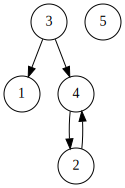

In [5]:
my_graph = Graph({1,2,3,4,5})
my_graph.add_edge((3,4))
my_graph.add_edge((2,4))
my_graph.add_edge((4,2))
my_graph.add_edge((3,1))

dot = get_dot_format(my_graph)

graphviz.Source(dot)

# this won't work on the VM, on the VM you should use
# dot.render(view=True)

# Graph Searches

## Breadth-First Search

In [0]:
from collections import deque

def breadth_first_search(graph, s):
    """
    Given a graph (an instance of Digraph) and a vertex s
    in the graph, will return construct a search tree from s
    using a breadth-first search.
    
    That is, a dictionary "reached" will be returned whose keys are all vertices
    reachable from s and where reached[v] is the predecessor of v in the search.
    The exception is reached[s] == s.
    
    Use can use get_path(reached, s, t) to recover a path from s to t
    in the graph, after running this search.
    
    >>> g1 = Graph({"A","B","C","D"}, [("A","B"), ("B","D"), ("C","B"), ("C","D")])
    >>> breadth_first_search(g1, "A").keys() == {"A", "B", "D"}
    True
    >>> breadth_first_search(g1, "C").keys() == {"C", "B", "D"}
    True
    >>> breadth_first_search(g1, "B").keys() == {"B", "D"}
    True
    >>> breadth_first_search(g1, "D").keys() == {"D"}
    True
    >>> g2 = Graph({"A","B","C"}, [("A","B"), ("B","C"), ("C","B")])
    >>> breadth_first_search(g2, "A").keys() == {"A", "B", "C"}
    True
    >>> breadth_first_search(g2, "B").keys() == {"B", "C"}
    True
    >>> breadth_first_search(g2, "C").keys() == {"B", "C"}
    True
    """

    reached = {s:s}
    todo = deque([s])

    while todo: # condition is true if and only if todo is not empty
      curr = todo.popleft()
        
      for nbr in graph.neighbours(curr):
        if nbr not in reached:
          reached[nbr] = curr
          todo.append(nbr)

    return reached

In [7]:
# Use this block to set up some simple tests to call search with while you are
# debugging. An example is included.

simple_graph = Graph({'A', 'B', 'C'}, [('A', 'B'), ('A', 'C')])

print(breadth_first_search(simple_graph, 'A'))
print(breadth_first_search(simple_graph, 'B'))

{'A': 'A', 'B': 'A', 'C': 'A'}
{'B': 'B'}


In [8]:
# testing with a large random graph where each vertex has
# 10 random outgoing edges

import random, time

num_vertices = 100000

print("Constructing random graph with", num_vertices, "vertices")
print("and", 10*num_vertices, "edges.")

vertices = set(range(num_vertices))

edges = []
for v in vertices:
  # for each vertex, create 10 random outgoing edges, we are not concerned
  # about duplicate edges or loops
  edges += [(v, random.randrange(num_vertices)) for x in range(10)]

random_graph = Graph(vertices, edges)

print("Starting search...")
start = time.time()
reached = breadth_first_search(random_graph, 0)
end = time.time()
print("Done!\nElapsed time in seconds:", end-start)
print("Number of vertices reached:", len(reached))


Constructing random graph with 100000 vertices
and 1000000 edges.
Starting search...
Done!
Elapsed time in seconds: 0.41315555572509766
Number of vertices reached: 99996


## Recovering a Path

In [0]:
def get_path(reached, start, end):
  """
  Return a path from start to end, given a search tree.
  
  reached:
    A dictionary representing a search tree of a search
    initiated from the vertex "start".
  start:
    The vertex that was the start of the search that constructed
    the search tree
  end:
    The desired endpoint of the search
  
  Returns a list of vertices starting at vertex start and ending at vertex end
  representing a path between these vertices (the path in the search tree).
  If the vertex "end" was not reached (i.e. is not a key in reached),
  this simply returns the empty list []
  
  # the example in the docstring test is the search tree run on the graph
  # drawn using graphviz above, starting from vertex 3
  
  >>> reached = {3:3, 1:3, 4:3, 2:4}
  >>> get_path(reached, 3, 2)
  [3, 4, 2]
  >>> get_path(reached, 3, 3)
  [3]
  >>> get_path(reached, 3, 5)
  []
  """
  
  if end not in reached:
    return []
  
  path = [end]
  
  while end != start:
    end = reached[end]
    path.append(end)
    
  path.reverse()
  
  return path

In [10]:
# Use this block to debug your get_path implementation. An example is provided.

simple_graph = Graph({'A', 'B', 'C'}, [('A', 'B'), ('B', 'C')])

reached = breadth_first_search(simple_graph, 'A')

print(get_path(reached, 'A', 'C')) # should print ['A', 'B', 'C']

['A', 'B', 'C']


## Depth-First Search

In [0]:
def depth_first_search(graph, s):
  """
  Perform a depth-first search starting from vertex s in the graph.
  Returns the search tree as a dictionary.
  
  Put a few docstring tests in here! It's hard to predict exactly what
  dictionary will be returned, it depends on the order the Graph.neighbours()
  method produces them.
  
  The best you can do here is just to check that the keys
  of the reached dictionary are all nodes that are reachable.
  """
  
  reached = dict()
  
  # do recursion, starting from s
  def do_dfs(curr, prev):
    """
    Do the dfs from vertex curr, having come from vertex prev.
    """
    if curr in reached:
      return
    reached[curr] = prev
    
    for nbr in graph.neighbours(curr):
      do_dfs(nbr, curr)
      
  do_dfs(s, s)
  
  return reached

In [18]:
# again, use this block to test your implementation
graph = Graph({1, 2, 3, 4})
graph.add_edge( (1, 4) )
graph.add_edge( (1, 2) )
graph.add_edge( (2, 3) )
graph.add_edge( (3, 4) )

print(depth_first_search(graph, 1))

{1: 1, 4: 1, 2: 1, 3: 2}


# Doctest Block
Run the following to check all docstring tests. Quite a few will fail until we are all done implementing the searches!

In [13]:
import doctest
doctest.testmod()

TestResults(failed=0, attempted=68)